***Script with some examples for signal processing methods***

## Imports

In [62]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
import os

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [22]:
# repertoire with some artificially generated data
cwd = os.getcwd()
DATADIR = "/wave_data/"

## Import

In [24]:
data = np.genfromtxt(cwd + DATADIR + 'signal_1.txt')

In [26]:
# form a list with all file numbers present in the repertoire,
# in ascending order
all_filenames = os.listdir(cwd + DATADIR)
all_filenumbers = []
for filename in all_filenames:
    number_file = int(filename.replace('.', '_').split('_')[1])
    all_filenumbers.append(number_file)
all_filenumbers = sorted(all_filenumbers)
    
# group all signals into one list, ensuring corresponding order
def read_waves(isignal):
    data = np.genfromtxt(cwd + DATADIR + 'signal_' +str(isignal) + '.txt')
    data = data.reshape((1, len(data)))
    return(data)
all_data = []
for i in sorted(all_filenumbers):
    all_data.append(read_waves(i))

## Pretraitement et featuring

In [27]:
# convert data to numpy array
all_data = np.squeeze(np.array(all_data))

# normalize data
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
all_data_normalized = min_max_scaler.fit_transform(all_data)
all_data_normalized

array([[0.55525704, 0.5714251 , 0.43584051, ..., 0.70548358, 0.64443759,
        0.59200452],
       [0.58354525, 0.37000888, 0.5626412 , ..., 0.46218934, 0.45828217,
        0.42804343],
       [0.5094026 , 0.60809975, 0.40303386, ..., 0.70657547, 0.80929558,
        0.48123247],
       ...,
       [0.65394   , 0.575981  , 0.4814286 , ..., 0.15190006, 0.85435771,
        0.63242012],
       [0.46161368, 0.53699689, 0.33564286, ..., 0.64579839, 0.36675577,
        0.70428715],
       [0.57753905, 0.51748511, 0.41756507, ..., 0.37246339, 0.72296419,
        0.94332376]])

MinMaxScaler rescales the data to be in the range between 0 and 1

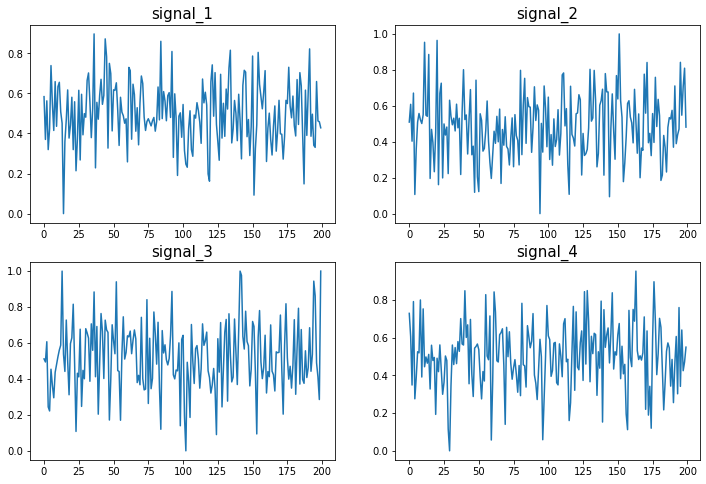

In [28]:
# visualize some results
def plot_examples(df, isignals):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
    axes[0, 0].plot(df[isignals[0], :])
    axes[0, 0].set_title('signal_' + str(isignals[0]), fontsize=15)
    axes[0, 1].plot(df[isignals[1], :])
    axes[0, 1].set_title('signal_' + str(isignals[1]), fontsize=15)
    axes[1, 0].plot(df[isignals[2], :])
    axes[1, 0].set_title('signal_' + str(isignals[2]), fontsize=15)
    axes[1, 1].plot(df[isignals[3], :])
    axes[1, 1].set_title('signal_' + str(isignals[3]), fontsize=15)
    plt.show()

plot_examples(all_data_normalized, [1,2,3,4])

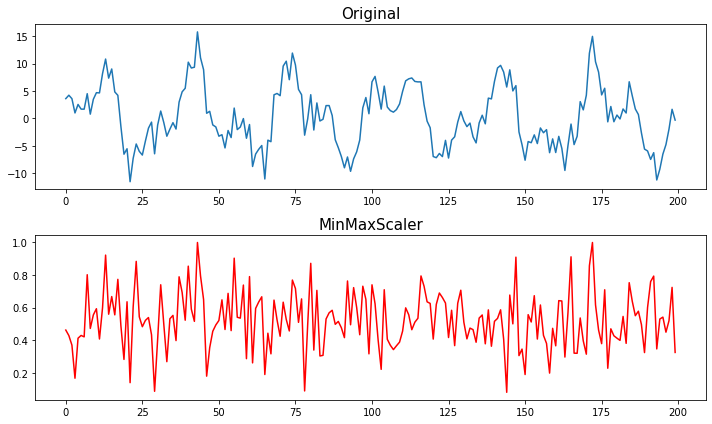

In [29]:
fig, axes = plt.subplots(2, 1, figsize=(10,6))
isignal=42
axes[0].plot(all_data[isignal, :])
axes[0].set_title('Original', fontsize = 15)
axes[1].plot(all_data_normalized[isignal, :], 'r')
axes[1].set_title('MinMaxScaler', fontsize = 15)
plt.tight_layout()
plt.show()

The data are rescaled correctly but the time series now look much noisier than originally. This seems to be not an ideal rescaler here

In [30]:
# apply alternative function for normalization, 'min-max scaler'
def global_min_max_rescale(X):
    global_min = np.min(X)
    global_max = np.max(X)
    return (X-global_min)/(global_max-global_min)

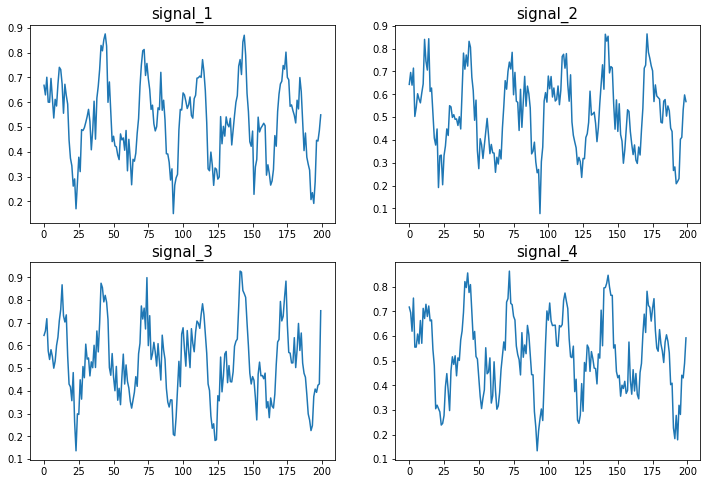

In [31]:
all_data_gminmax = global_min_max_rescale(all_data)
plot_examples(all_data_gminmax, [1,2,3,4])

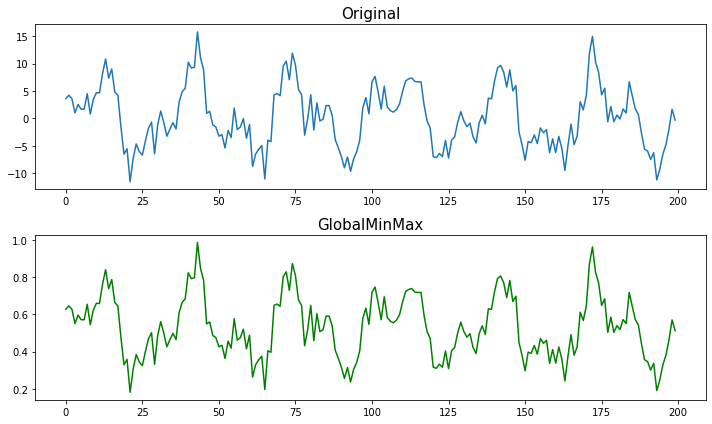

In [32]:
fig, axes = plt.subplots(2, 1, figsize=(10,6))
isignal=42
axes[0].plot(all_data[isignal, :])
axes[0].set_title('Original', fontsize = 15)
axes[1].plot(all_data_gminmax[isignal, :], 'g')
axes[1].set_title('GlobalMinMax', fontsize = 15)
plt.tight_layout()
plt.show()

The transformed data look much closer to the original data while still being rescaled to the 0-1 range

There are also other alternatives. For example, the RobustScaler is more robust to outliers. It removes the median and scales the data according to the quantile range. However, the results do not look nicer than the GlobalMinMax rescaker

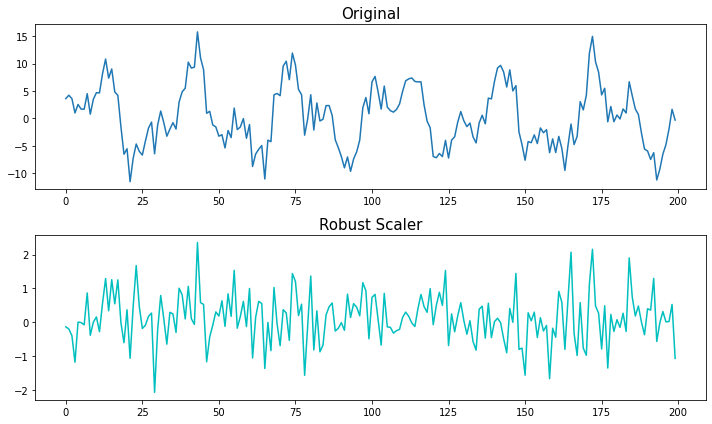

In [33]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
all_data_robust = rs.fit_transform(all_data)

fig, axes = plt.subplots(2, 1, figsize=(10,6))
isignal=42
axes[0].plot(all_data[isignal, :])
axes[0].set_title('Original', fontsize = 15)
axes[1].plot(all_data_robust[isignal, :], 'c')
axes[1].set_title('Robust Scaler', fontsize = 15)
plt.tight_layout()
plt.show()

The following rescaler uses Quantile information. However the results look even noisier

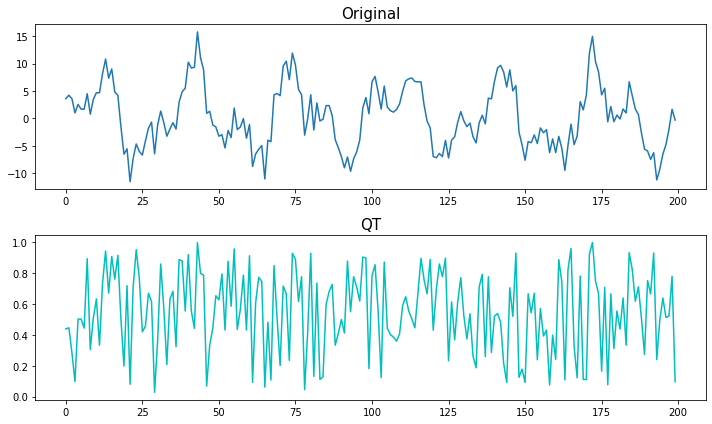

In [34]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=10, random_state=0)
all_data_qt = qt.fit_transform(all_data)

fig, axes = plt.subplots(2, 1, figsize=(10,6))
isignal=42
axes[0].plot(all_data[isignal, :])
axes[0].set_title('Original', fontsize = 15)
axes[1].plot(all_data_qt[isignal, :], 'c')
axes[1].set_title('QT', fontsize = 15)
plt.tight_layout()
plt.show()

**Get the amplitude and frequency vectors by applying an FFT**

In [35]:
samplingFrequency = 100
signal = all_data_gminmax[1, :]
fourierTransform = np.fft.fft(signal)/len(signal)              # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(signal)/2))] # Exclude sampling frequency

T           = len(signal)                # number of time points
values      = np.arange(int(T/2))
timePeriod  = T/samplingFrequency
frequencies = values/timePeriod

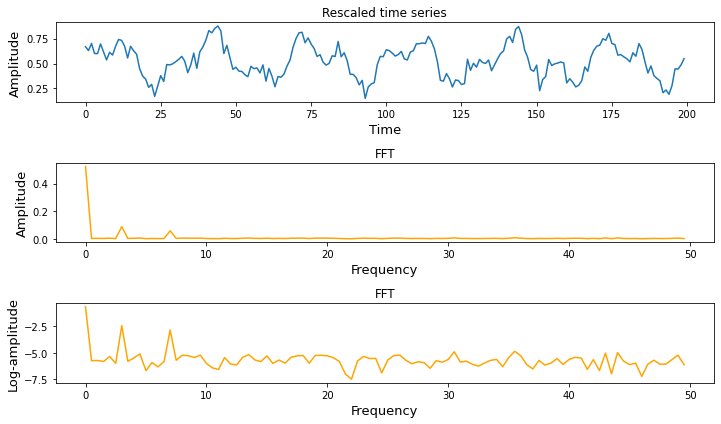

In [36]:
# plot the FFT spectrum
figure, axis = plt.subplots(3, 1, figsize=(10,6))
axis[0].set_title('Rescaled time series')
axis[0].plot(signal)
axis[0].set_xlabel('Time', fontsize=13)
axis[0].set_ylabel('Amplitude', fontsize=13)

axis[1].set_title('FFT')
axis[1].plot(frequencies, abs(fourierTransform), color='orange')
axis[1].set_xlabel('Frequency', fontsize=13)
axis[1].set_ylabel('Amplitude', fontsize=13)

axis[2].set_title('FFT')
axis[2].plot(frequencies, np.log(abs(fourierTransform)), color='orange')
axis[2].set_xlabel('Frequency', fontsize=13)
axis[2].set_ylabel('Log-amplitude', fontsize=13)
plt.tight_layout()
plt.show()

(often a log-transformation is applied for visualization)

**Apply a lowpass-filter to remove some of the noisy components and make the time series smoother.
One can play with the cutoff frequency**

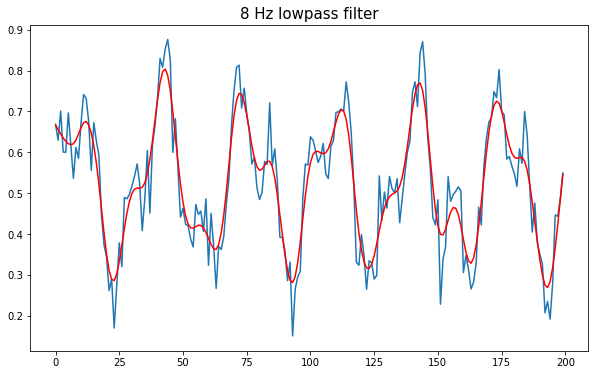

In [37]:
import numpy as np
from scipy.signal import butter,filtfilt

signal = all_data_gminmax[1, :]

T        = len(signal)   # Sample Period
fs       = 100           # sample rate, Hz
cutoff   = 8             # desired cutoff frequency of the filter
n        = int(T * fs)   # total number of samples
nyq      = 0.5 * fs      # Nyquist Frequency
order    = 2             # filter order

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(signal, cutoff, fs, order)
figure, axis = plt.subplots(figsize=(10,6))
plt.plot(signal)
plt.plot(y, 'r', label = 'lowpass-filtered')
plt.title(str(cutoff) + ' Hz lowpass filter', fontsize = 15)
plt.show()

## Dimensionality reduction
Reduce now the number of feature dimensions to improve future learning procedures.

Examples for dimensionality reduction methods: Principal Component Analysis (PCA), Independent Component Analysis (ICA), Factor Analysis, Linear Discriminant Analysis. Here I will implement PCA

In [38]:
from sklearn.decomposition import PCA

def apply_PCA(df, ncomponents, transform = False):
    
    if transform:
        df = global_min_max_rescale(df)
    
    pca = PCA(n_components=ncomponents)
    principalComponents = pca.fit_transform(df)
    
    return principalComponents, pca

ncomps = 70
principalComponents, pca = apply_PCA(all_data_gminmax, ncomps, transform = False)

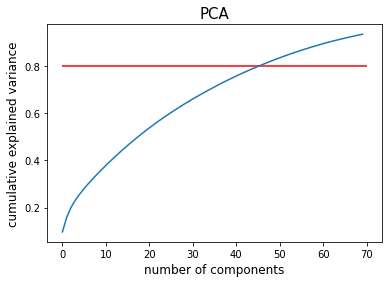

In [39]:
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.hlines(0.8, 0, 70, 'r')
ax.set_xlabel('number of components', fontsize=12)
ax.set_ylabel('cumulative explained variance', fontsize=12);
ax.set_title('PCA', fontsize=15)
plt.show()

-> i.e. with the first 50 components we explain more than 80% of the variance

## Anomaly detection
Look for anomalies in the data set using non-supervised learning.

In [40]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

Detected 19 anomalies


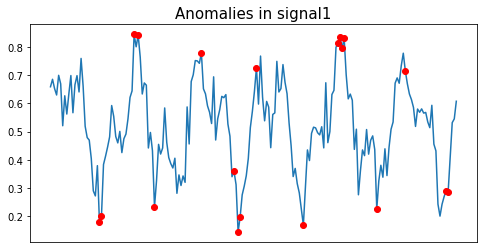

In [41]:
def find_anomalies(data, isignal, plot=False):
    
    import warnings
    warnings.filterwarnings('ignore')
    import pandas as pd
    # restructure to data frame
    df = pd.DataFrame()
    for i in range(1, 101):
        df['signal' + str(i)] = all_data_gminmax[i-1, :]
    df.reset_index(inplace=True)
    df.rename(columns={"index": "time"}, inplace=True)
    
    # an important parameter here is 'contamination', which indicates the expected percentage of 
    # samples with anomalies. 10% is a fair standard value (but depends on the data of course)
    clf=IsolationForest(n_estimators=10, max_samples='auto', contamination=0.1, max_features=1.0, \
                            bootstrap=False, n_jobs=-1, random_state=42, verbose=0,behaviour='new')
    signal = 1
    clf.fit(df[['signal' + str(signal)]])
    df['scores']=clf.decision_function(df[['signal' + str(signal)]])
    df['anomaly_signal' + str(signal)]=clf.predict(df[['signal1']])
    df.loc[df['anomaly_signal' + str(signal)] == 1,'anomaly_signal' + str(signal)] = 0
    df.loc[df['anomaly_signal' + str(signal)] == -1,'anomaly_signal' + str(signal)] = 1
    df.head()
    
    if plot:
        print('Detected ' + str(df['anomaly_signal' + str(signal)].value_counts()[1]) + ' anomalies')

    bool_array = (abs(df['anomaly_signal' + str(signal)]) > 0)
    if plot:
        fig, ax = plt.subplots(figsize=(8,4))
        plt.plot(df['time'], df['signal' + str(signal)])
        plt.plot(df['time'][bool_array], df['signal' + str(signal)][bool_array], marker='o', color='r', linestyle = 'None')
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False) 
        ax.set_title('Anomalies in signal' +str(signal), fontsize=15)
        plt.show()
    
    return(df['anomaly_signal' + str(signal)])
    
_ = find_anomalies(all_data_gminmax, 1, plot=True)

**Make list of anomalies**

Here I create a matrix where for each signal (row) and timepoint (column), 1 indicates the presence of an anomaly, 0 indicates normal signal

In [42]:
all_anomalies = []
for isignal in range(1, 101):
    
    anomalies = find_anomalies(all_data_gminmax, isignal)
    all_anomalies.append(anomalies)
all_anomalies = np.squeeze(np.array(all_anomalies))
all_anomalies

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Autoencoder

Autoencoders are methods of compression /reduction of dimensions which is very useful for creating a vectorial representation of different data. There exist very different algorithms.

For time series, an LSTM (Long Short Term Memory model) autoencoder seems appropriate. In brief, LSTM is an artificial recurrent neural network with an architecture that is designed for sequential data. I will be using a very simple model, but there are options to make it more sophisticated (like using Dropout).

I will here train the autoencoder on all the signals, to learn a compressed version of the time series, therefore applying a dimensionality reduction.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras import metrics

In [44]:
# restructure the transformed signals to data frame
import pandas as pd
df = pd.DataFrame()
for i in range(1, 101):
    df['signal' + str(i)] = all_data_gminmax[i-1, :]
    
X = df.to_numpy()

In [45]:
print('Original shape: ' + str(X.shape))
if not len(X.shape)==3:
    X = np.reshape(X,(X.shape[0],1,X.shape[1]))
    print('X reshaped to ' + str(X.shape))

Original shape: (200, 100)
X reshaped to (200, 1, 100)


In [46]:
# here we are using a random signal as the to-be-predicted time series
import random
Y = df.loc[:, 'signal' + str(random.randint(1,100))].to_numpy()

In [47]:
#create model
model = Sequential()
model.add(LSTM(100,activation='tanh',input_shape=(1,X.shape[2]),recurrent_activation='hard_sigmoid'))
model.add(Dense(1))

model.compile(loss='mse',optimizer='rmsprop',metrics=[metrics.mae])
model.fit(X,Y,epochs=15,batch_size=1,verbose=2)

Epoch 1/15
200/200 - 0s - loss: 0.0127 - mean_absolute_error: 0.0835
Epoch 2/15
200/200 - 0s - loss: 0.0072 - mean_absolute_error: 0.0685
Epoch 3/15
200/200 - 0s - loss: 0.0064 - mean_absolute_error: 0.0633
Epoch 4/15
200/200 - 0s - loss: 0.0059 - mean_absolute_error: 0.0636
Epoch 5/15
200/200 - 0s - loss: 0.0051 - mean_absolute_error: 0.0583
Epoch 6/15
200/200 - 0s - loss: 0.0049 - mean_absolute_error: 0.0582
Epoch 7/15
200/200 - 0s - loss: 0.0046 - mean_absolute_error: 0.0555
Epoch 8/15
200/200 - 0s - loss: 0.0043 - mean_absolute_error: 0.0519
Epoch 9/15
200/200 - 0s - loss: 0.0042 - mean_absolute_error: 0.0511
Epoch 10/15
200/200 - 0s - loss: 0.0042 - mean_absolute_error: 0.0520
Epoch 11/15
200/200 - 0s - loss: 0.0037 - mean_absolute_error: 0.0483
Epoch 12/15
200/200 - 0s - loss: 0.0038 - mean_absolute_error: 0.0494
Epoch 13/15
200/200 - 0s - loss: 0.0036 - mean_absolute_error: 0.0476
Epoch 14/15
200/200 - 0s - loss: 0.0034 - mean_absolute_error: 0.0469
Epoch 15/15
200/200 - 0s - lo

In [48]:
x_predict = model.predict(X,verbose = 1)

7/7 [==============================] - 0s 931us/step


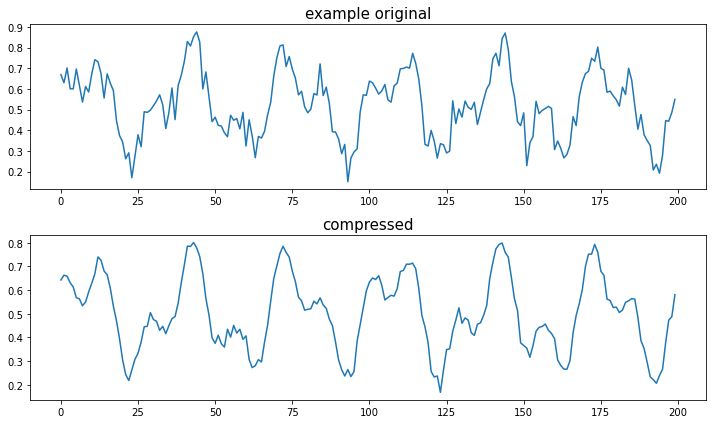

In [49]:
fig, axes = plt.subplots(2, 1, figsize=(10,6))
axes[0].plot(all_data_gminmax[1, :])
axes[0].set_title('example original', fontsize = 15)
axes[1].plot(x_predict)
axes[1].set_title('compressed', fontsize = 15)
plt.tight_layout()
plt.show()

-> the autoendcoder has learnt a compressed version of the time series

**Detect anomalies based on autoencoders**

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras import metrics

In [54]:
# restructure the transformed signals to data frame
import pandas as pd
df = pd.DataFrame()
for i in range(1, 101):
    df['signal' + str(i)] = all_data_gminmax[i-1, :]

In [55]:
# choose signal to scan for anomalies
signal_of_interest = 42
# choose which data to use as predictors
predictor = 'other_signals'    # 'mean' or 'other_signals'

In [56]:
# take the mean as predictor
if predictor=='mean':
    X = df.mean(axis=1).to_numpy()

elif predictor == 'other_signals':
    
    X = df.loc[:, df.columns != ('signal' + str(signal_of_interest))].to_numpy()
    
else:
    raise ValueError('invalid predictor specified')    

Y = df.loc[:, 'signal' + str(signal_of_interest)].to_numpy()
X = np.expand_dims(X, axis=1)

In [57]:
print('Original shape: ' + str(X.shape))
if not len(X.shape)==3:
    X = np.reshape(X,(X.shape[0],1,X.shape[1]))
    print('X reshaped to ' + str(X.shape))

Original shape: (200, 1, 99)


In [58]:
#create model
model = Sequential()
model.add(LSTM(100,activation='tanh',input_shape=(1,X.shape[2]),recurrent_activation='hard_sigmoid'))
model.add(Dense(1))

model.compile(loss='mse',optimizer='rmsprop',metrics=[metrics.mae])
model.fit(X,Y,epochs=15,batch_size=1,verbose=2)

Epoch 1/15
200/200 - 0s - loss: 0.0116 - mean_absolute_error: 0.0834
Epoch 2/15
200/200 - 0s - loss: 0.0060 - mean_absolute_error: 0.0614
Epoch 3/15
200/200 - 0s - loss: 0.0048 - mean_absolute_error: 0.0557
Epoch 4/15
200/200 - 0s - loss: 0.0045 - mean_absolute_error: 0.0530
Epoch 5/15
200/200 - 0s - loss: 0.0045 - mean_absolute_error: 0.0527
Epoch 6/15
200/200 - 0s - loss: 0.0039 - mean_absolute_error: 0.0506
Epoch 7/15
200/200 - 0s - loss: 0.0040 - mean_absolute_error: 0.0483
Epoch 8/15
200/200 - 0s - loss: 0.0040 - mean_absolute_error: 0.0512
Epoch 9/15
200/200 - 0s - loss: 0.0038 - mean_absolute_error: 0.0483
Epoch 10/15
200/200 - 0s - loss: 0.0037 - mean_absolute_error: 0.0489
Epoch 11/15
200/200 - 0s - loss: 0.0036 - mean_absolute_error: 0.0479
Epoch 12/15
200/200 - 0s - loss: 0.0036 - mean_absolute_error: 0.0477
Epoch 13/15
200/200 - 0s - loss: 0.0034 - mean_absolute_error: 0.0464
Epoch 14/15
200/200 - 0s - loss: 0.0035 - mean_absolute_error: 0.0479
Epoch 15/15
200/200 - 0s - lo

In [59]:
#Predict and compute reconstruction error
x_predict = model.predict(X,verbose = 1)
errors = abs(np.squeeze(x_predict) - np.squeeze(Y))

7/7 [==============================] - 0s 26ms/step


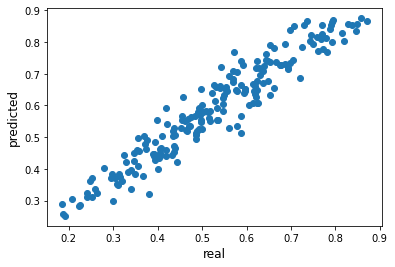

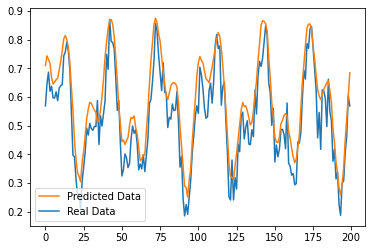

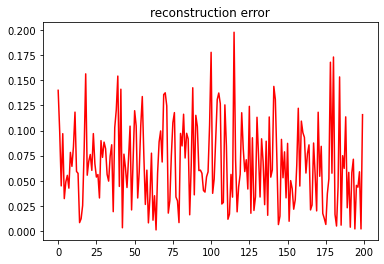

In [60]:
#Plot 
plt.figure(1)
plt.scatter(Y,x_predict)
plt.xlabel('real', fontsize=12)
plt.ylabel('predicted', fontsize=12)
plt.show(block = False)

plt.figure(2)
Test, =plt.plot(Y)
Predict, = plt.plot(x_predict)
plt.legend([Predict,Test],["Predicted Data", "Real Data"])
plt.figure(3)
plt.plot(errors, 'r')
plt.title('reconstruction error')
plt.show()

Apply a threshold on the error to identify potential anomalies

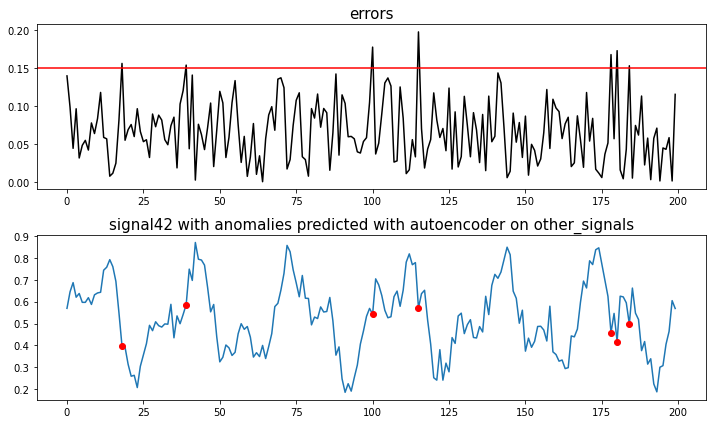

In [61]:
# choose threshold on error
thresh = np.mean(errors)+2*np.std(errors)
fig, axes = plt.subplots(2, 1, figsize=(10,6))
axes[0].plot(errors, 'k')
axes[0].set_title('errors', fontsize = 15)
axes[0].axhline(y=thresh, color='r', linestyle='-')

axes[1].plot(df['signal' + str(signal_of_interest)])
axes[1].set_title('signal' + str(signal_of_interest) + ' with anomalies predicted with autoencoder on ' + predictor, fontsize = 15)
time=np.arange(0, len(errors))
axes[1].plot(time[errors>thresh], df['signal' + str(signal_of_interest)][errors>thresh], marker='o', color='r', linestyle = 'None')
plt.tight_layout()
plt.show()